# Network Analysis (II)

## Contents of the notebook:

**1. Community Detection**

    1.1 Graph partition algorithms
    
    1.2 Community Toolbox

**2. PageRank method**

## 1. Community Detection

In the study of complex networks, a network is said to have community structure if the nodes of the network can be easily grouped into sets of nodes such that each set of nodes is densely connected internally. In the particular case of non-overlapping community finding, this implies that the network divides naturally into groups of nodes with **dense connections internally and sparser connections between groups**. But overlapping communities are also allowed. 

The more general definition is based on the principle that pairs of nodes are more likely to be connected if they are both members of the same community(ies), and less likely to be connected if they do not share communities.


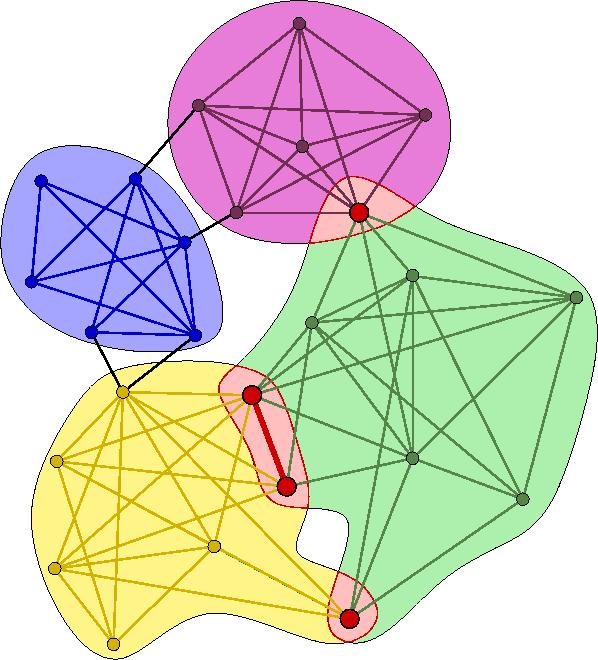
    
Communities of a graph [Figure source](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/34202/versions/4/screenshot.jpg). 
</div>



### 1.1 Graph-partition algorithms

Centrality measures can tell us what nodes might be at the centers of communities, but they don’t directly tell us what those communities are. What we need beyond that is an analytical method: 
- for splitting a network into communities (a **divisive algorithm**) — or conversely, 
- for collecting individual nodes into larger and larger communities (an **agglomerative algorithm**).

We will sketch one of the algorithms that exist as an example. The elegant divisive algorithm known as the *Girvan-Newman method* that depends on computing edge-betweenness values. 

#### Girvan-Newman Algorithm

The Girvan–Newman algorithm is a hierarchical method used to detect communities in complex systems [1]. The algorithm **detects communities by progressively removing edges from the original network**. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm **focuses on edges that are most likely "between" communities**.


[1] Girvan M. and Newman M. E. J., Community structure in social and biological networks, Proc. Natl. Acad. Sci. USA 99, 7821–7826 (2002)

Source: [here]() (Github source: [here](http://nbviewer.ipython.org/github/iit-cs579/main/blob/master/lec/l05/l05.ipynb)).

**Example**:

Begin by considering the graph below.

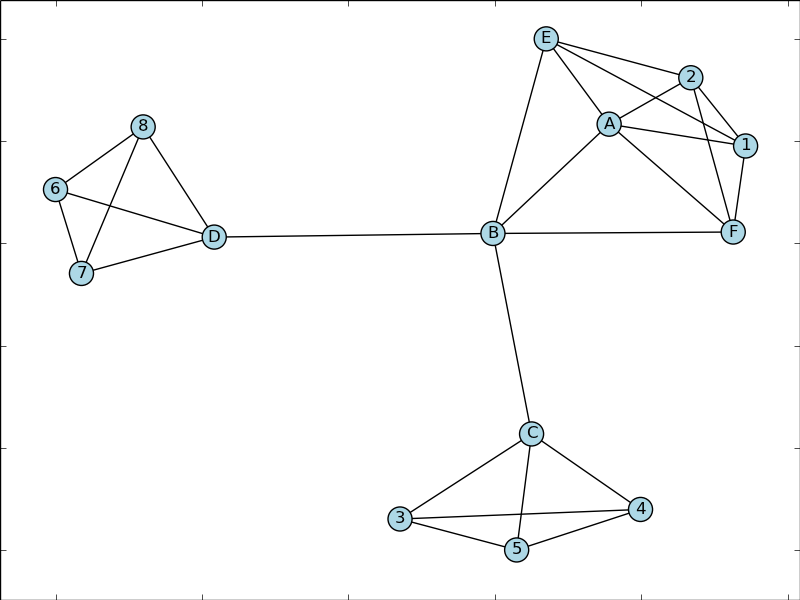
    
[Graph example](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/Social_Networks/Social_Networks.html). 
</div>

B’s links to D and C are different from B’s links to A, E and F. A, E, and F are part of a tight knit community where the people largely all know each other, and B is part of that community too. But B does not know any of the people C or D know. The links between B and C and B and D are community-spanning. The links between B and E, A, and F are within-group.

Note that removing the links from B to C and D splits the network into its 3 tightly knit subcommunities. Thus, one approach to community discovery is to remove the community-spanning edges until the graph splits into unconnected components. Those components will by definition be communities. In this case, removing (B, C) gives us 2 components, and then removing (B, D) gives us three.

But, **how do we find “community-spanning edges” (more commonly called local bridges)?**
The concept of *edge-betweenness* (already defined in the previous notebook) does a very good job finding local bridges. 

   - In the graph above, the node labeled D only lies on the shortest paths of edges in its own community. B on the other hand, lies on the shortest paths between all the edges in D’s community and all the edges in A’s community, adding up to 20 pairs. Thus the edge (B,D), which connects B to the D community, will have high betweenness. But B also lies on all the shortest paths between the D-community and the C-community, so (B,D) gets still more betweeness points in virtue of falling on the shortest paths between all the D-community edges and all the C-community edges (another 16 shortest paths). For similar reasons the (B,C) edge will be high scoring, because it lies on the best paths between the D-community and the C-community, and between the C-community and the A-community.


The following sketch of the Girvan-Newman method relies on the idea that edges of high edge-betweenness tend to be community-spanning:

1.- Find the edge of highest betweenness — or multiple edges of highest betweenness, if there is a tie — and remove these edges from the graph. This may cause the graph to separate into multiple components. If so, these are the largest communities in the partitioning of the graph.

2.- With these crucial edges missing, the betweenness levels of all edges may have changed, so recalculate all betweennesses, and again remove the edge or edges of highest betweenness. This may break some of the existing components into smaller components; if so, these are communities nested within the larger communities found thus far.

3.- Proceed in this way as long as edges remain in graph, in each step recalculating all betweennesses and removing the edge or edges of highest betweenness.


This very elegant algorithm thus finds the very largest communities first, and then successively smaller communities nested within those. As simple as it is to describe in words, it is quite computationally costly because it requires finding the best path between all pairs of remaining nodes at each step.


Source [Python for Social Science](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/Social_Networks/Social_Networks.html#why-study-networks).

***Example***

Here is a simple python implementation of the Girvan-Newman graph-partition method using networkx ([source code](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/_downloads/girvan_newman.py)).
The girvan_newman function is recursive. Each time it finds a way to split a graph into two optimal pieces, it calls itself on the pieces. It terminates when it is given a graph with only one node. It returns a list of all the components it has found:

In [ ]:
import networkx as nx

def girvan_newman (G):

    if len(G.nodes()) == 1:
        return [G.nodes()]

    def find_best_edge(G0):
        """
        Networkx implementation of edge_betweenness
        returns a dictionary. Make this into a list,
        sort it and return the edge with highest betweenness.
        """
        eb = nx.edge_betweenness_centrality(G0)
        eb_il = eb.items()
        eb_il.sort(key=lambda x: x[1], reverse=True)
        return eb_il[0][0]

    components = list(nx.connected_component_subgraphs(G))

    while len(components) == 1:
        G.remove_edge(*find_best_edge(G))
        components = list(nx.connected_component_subgraphs(G))

    result = [c.nodes() for c in components]

    for c in components:
        result.extend(girvan_newman(c))

    return result

**Exercise 1**: 
<ol>

Apply the girvan_newman function on the ego network graph.

</ol>
</div>

In [ ]:
# Your soultion here

### 1.2 Community toolbox

We can also use other algorithms, as the Louvain algorithm for community detection.
The Louvain Method for community detection is a method to extract communities from large networks created by Vincent Blondel, Jean-Loup Guillaume, Renaud Lambiotte and Etienne Lefebvre. The method is a greedy optimization method.
The value to be optimized is **modularity**, defined as a value between -1 and 1 that measures the density of links inside communities compared to links between communities.

In [ ]:
%matplotlib inline 
%pylab inline

In [ ]:
pylab.rcParams['figure.figsize'] = (12.0, 6.0)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Before import the toolbox download and install it, following the instructions in this
[link.](https://pypi.python.org/pypi/python-louvain)

In [ ]:
import community

#### Hamsterster Friendships Network Dataset 

Prepare the Hamsterster friendships graph again.

In [ ]:
hamsterster = nx.read_edgelist("files/petster-friendships-hamster.txt")

In [ ]:
# Return a new graph object that contains the network with pendant and
# isolated nodes removed
def trim_degrees(graph, degree=1):
    g = graph.copy()
    d=dict(nx.degree(g))
    for node in graph.nodes():
        if d[node] <= degree:
            g.remove_node(node)
    return g

len(trim_degrees(hamsterster))

In [ ]:
hamsTrim = trim_degrees(hamsterster, degree=25)

In [ ]:
posHamTrim = nx.spring_layout(hamsTrim,iterations=1000) # Spring layout can iterate 

In [ ]:
# Degree centrality:
degreeHamTrim = nx.degree_centrality(hamsTrim)

nsize = np.array([v for v in degreeHamTrim.values()])
cte=1000
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))

nodes=nx.draw_networkx_nodes(hamsTrim,pos=posHamTrim,  node_size=nsize, alpha=.6)
edges=nx.draw_networkx_edges(hamsTrim,pos=posHamTrim, alpha=.1)

In [ ]:
#first compute the best partition:
partition = community.best_partition(hamsTrim)

In [ ]:
print("Number of found communities:", max(partition.values()))

In [ ]:
colors2 = [partition.get(node) for node in hamsTrim.nodes()]

In [ ]:
nsize = np.array([v for v in degreeHamTrim.values()])
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))

nodes=nx.draw_networkx_nodes(hamsTrim,pos=posHamTrim, cmap = plt.get_cmap('Paired'), 
                             node_color = colors2, node_size=nsize, alpha=.6)
edges=nx.draw_networkx_edges(hamsTrim,pos=posHamTrim,alpha=.1)
plt.axis('off') 


The algotithm has found 4 communities, but they are quite mixed...

#### HIV Dataset

Let's see the result with the HIV example.

In [ ]:
hiv = nx.read_adjlist("files/hiv/out.hiv")

In [ ]:
hiv.remove_node('%')
hiv.remove_node('unweighted')
hiv.remove_node('sym')

In [ ]:
# compute the communities:

# To complete


In [ ]:
# Print the number of found communities:

# To complete


In [ ]:
# Create the colors vector:

# To complete

In [ ]:
# Draw the network with different colors for the communities:

# To complete


## 2. Page Rank Method.

The importance of a Web page is an inherently subjective matter, which depends on the
readers interests, knowledge and attitudes. But there is still much that can be said objectively
about the relative importance of Web pages. **PageRank** is a method for
rating Web pages objectively and mechanically, effectively measuring the human interest and
attention devoted to them.

***References***

- A. Langville and C. Meyer, “A survey of eigenvector methods of web information retrieval”. 
    
- Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry, [The PageRank citation ranking: Bringing order to the Web.](http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf) 1999.
- Sergey Brin and Lawrence Page, [The Anatomy of a Large-Scale Hypertextual Web Search Engine](http://infolab.stanford.edu/~backrub/google.html).



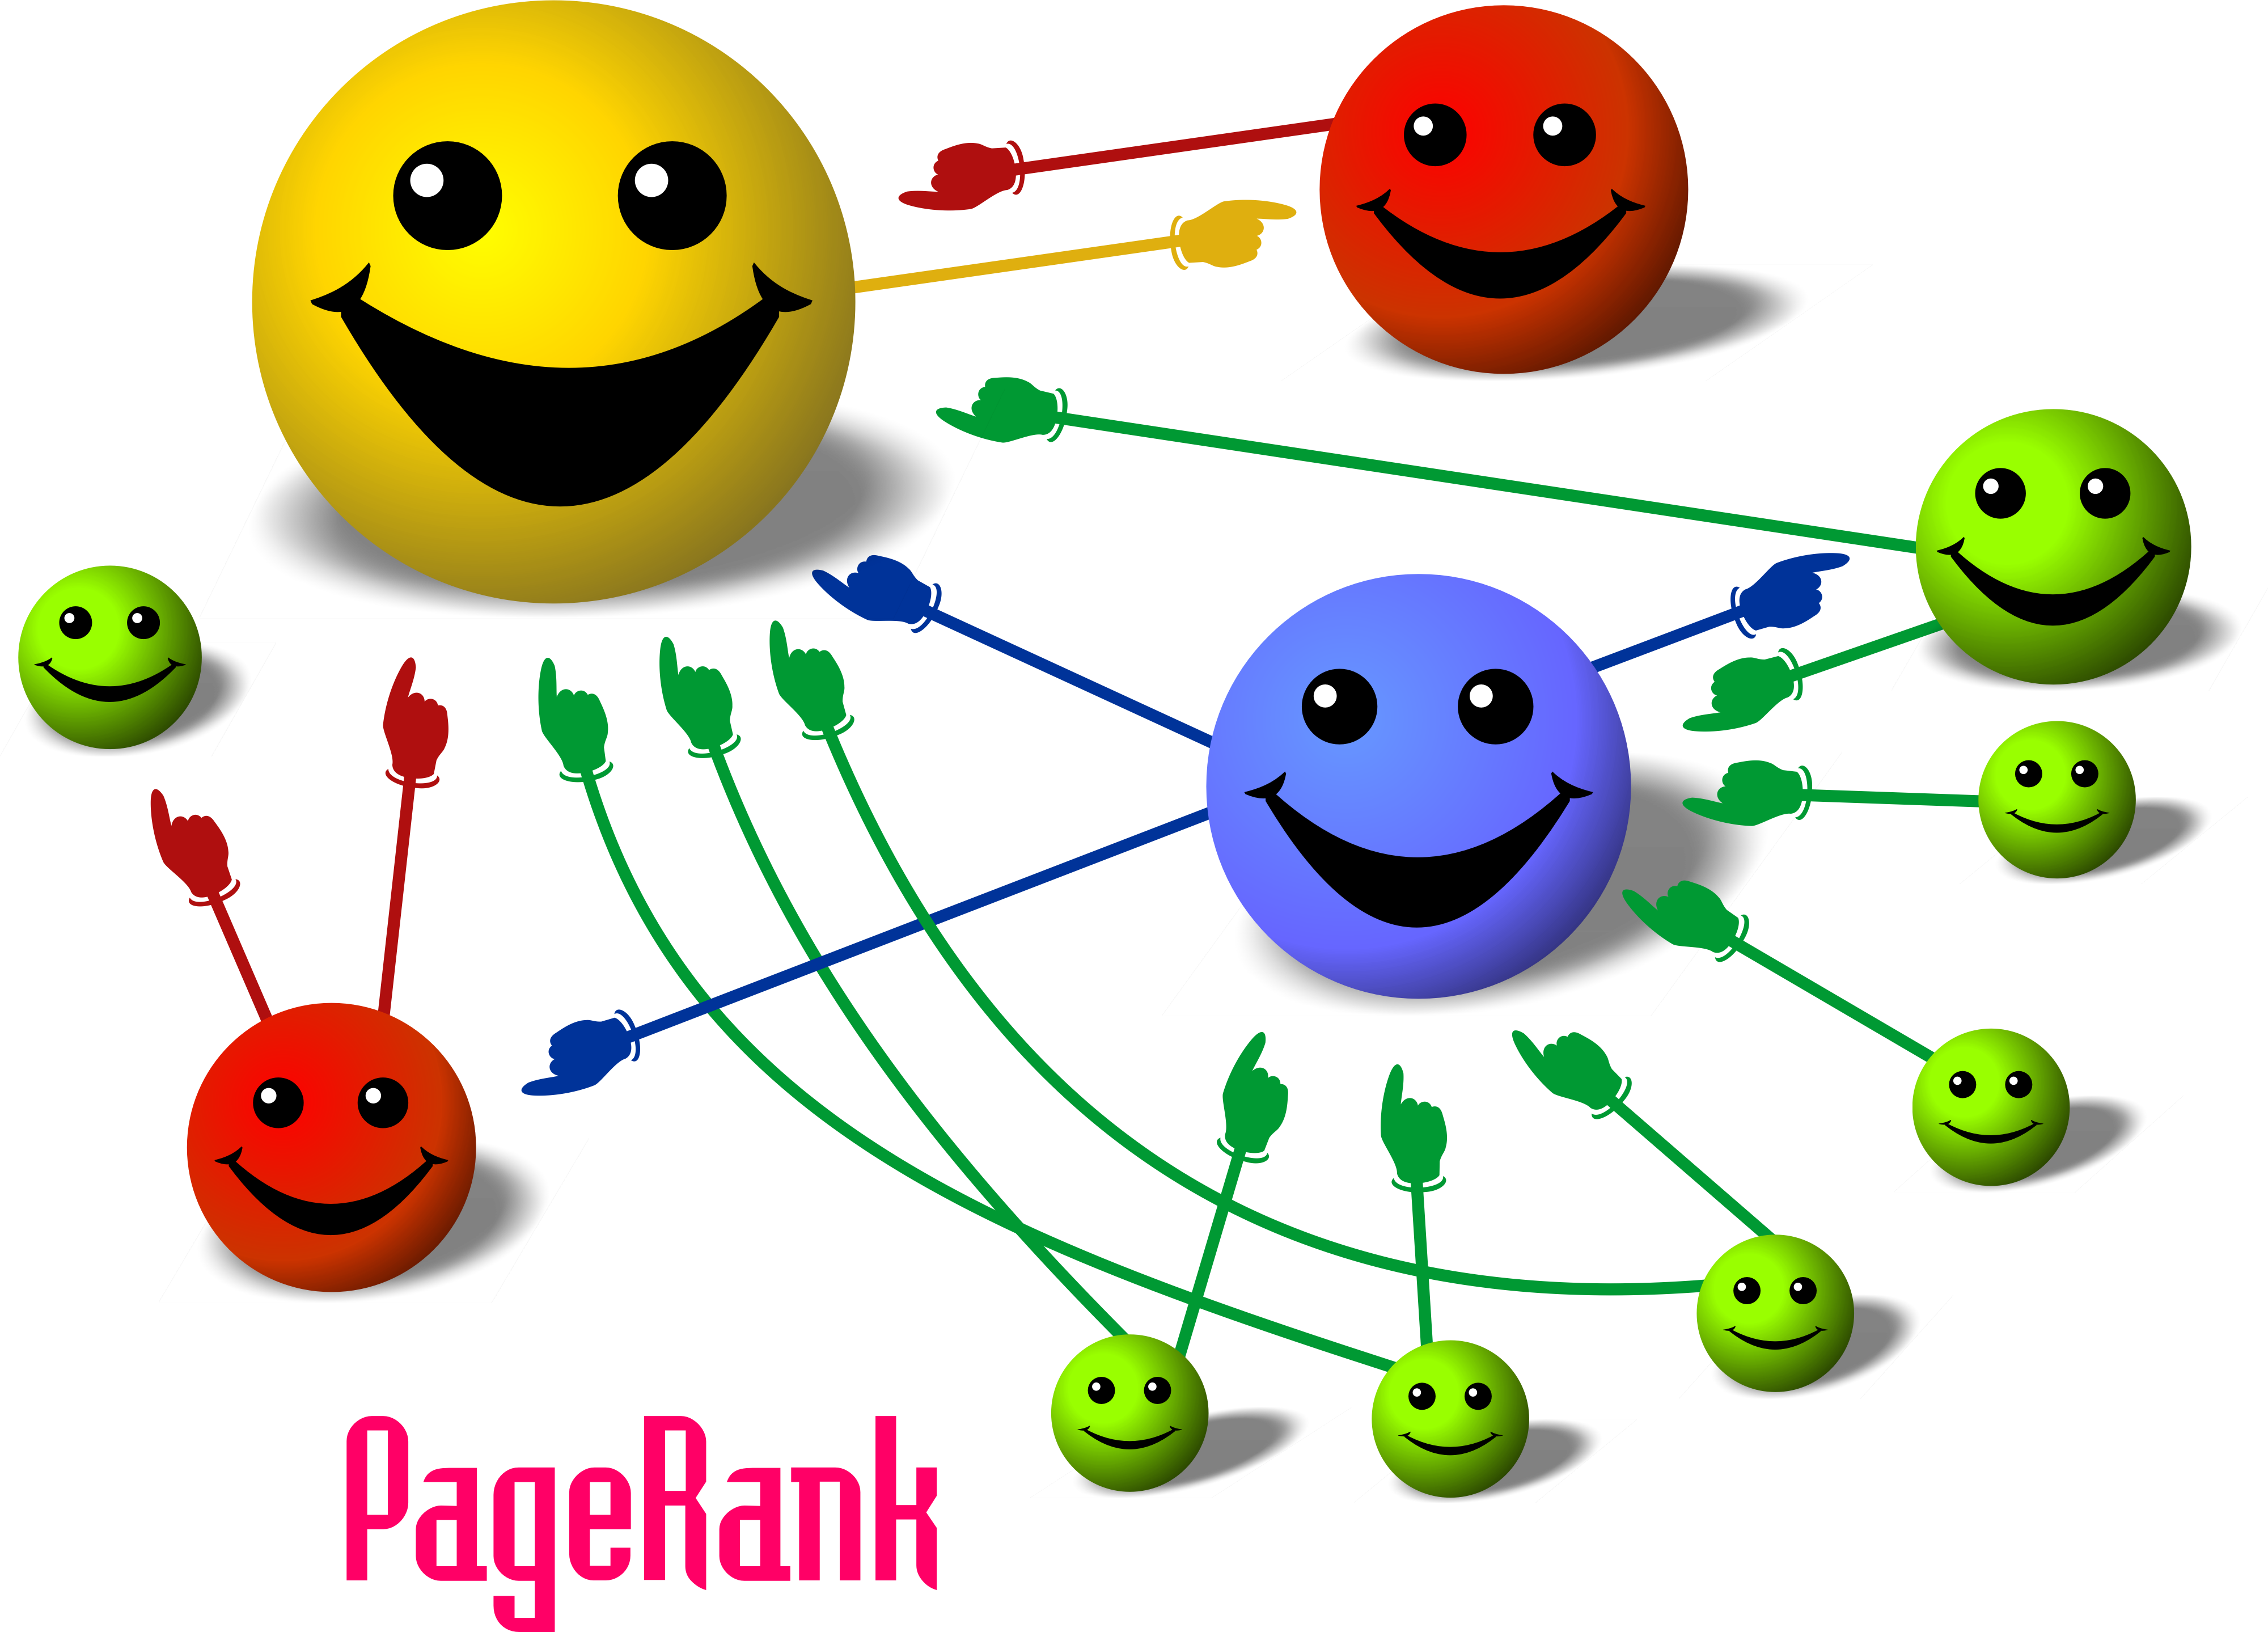
    
*Ilustration of Page Rank [Wiki](http://en.wikipedia.org/wiki/PageRank)*
</div>


In the figure, the size of each face is proportional to the total size of the other faces which are pointing to it.

Intuitively, a page has high rank if the sum of the ranks of its incoming edges is high. This covers both the case when a page has many incoming links and when a page has a few highly ranked incoming links. 

If a network is directed, meaning that edges point in one direction from one node to another node, then nodes have two different degrees, the **in-degree**, which is the number of incoming edges, and the **out-degree**, which is the number of outgoing edges. 

**Example:**

Suppose for instance, that we have a small Internet consisting of just 4 web sites www.page1.com, www.page2.com, www.page3.com, www.page4.com, referencing each other in the manner suggested by the picture:


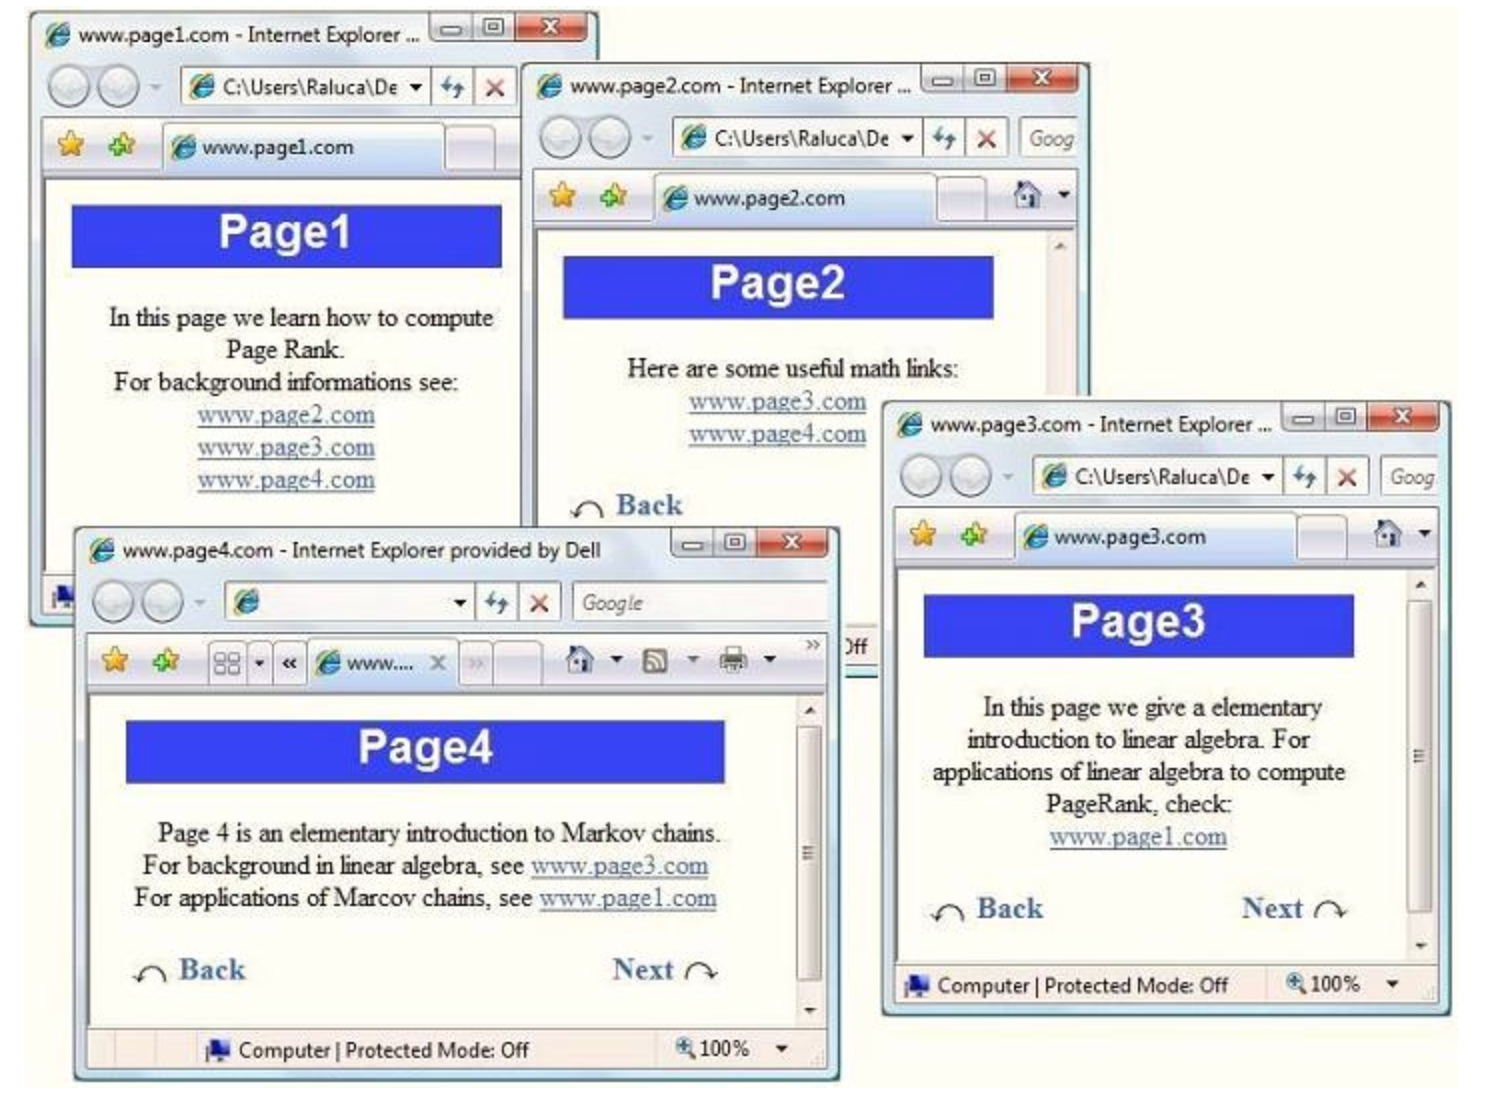
    
Source: [Example](http://www.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html)
</div>

We "translate" the picture into a directed graph with 4 nodes, one for each web site. When web site i references j, we add a directed edge between node i and node j in the graph. For the purpose of computing their page rank, we ignore any navigational links such as back, next buttons, as we only care about the connections between different web sites. 

We can illustrate the relations with the following graph: Page1 links to all of the other pages, so node 1 in the graph will have outgoing edges to all of the other nodes. Page3 has only one link, to Page 1, therefore node 3 will have one outgoing edge to node 1.

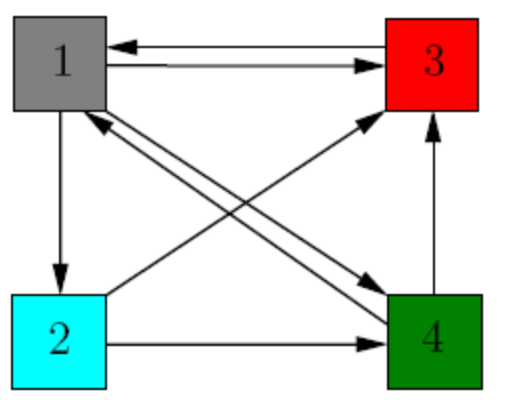
</div>


In our model, each page should transfer evenly its importance to the pages that it links to:
- Node 1 has 3 outgoing edges, so it will pass on  of its importance to each of the other 3 nodes. 
- Node 3 has only one outgoing edge, so it will pass on all of its importance to node 1. 

In general, if a node has k outgoing edges, it will pass on  of its importance to each of the nodes that it links to. Let us better visualize the process by assigning weights to each edge.


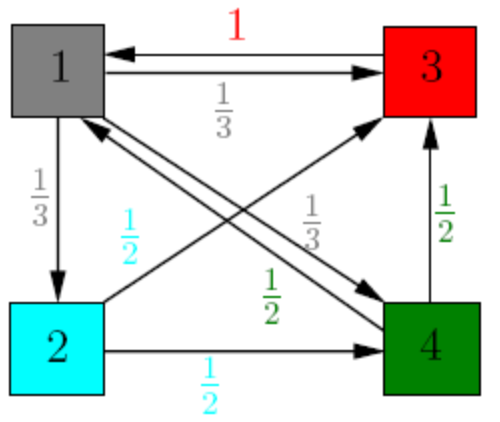
</div>


The **transition matrix** A associated to a directed graph is defined as follows: If there is an edge from $i$ to $j$ and the out-degree of vertex $i$ is $d_i$, then on column $i$ and row $j$ we put $1/ d_i$. Otherwise we mark column $i$, row $j$ with zero. 

The transition matrix of the graph in the example is

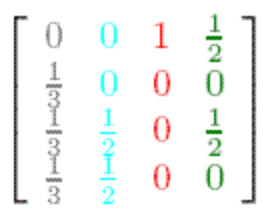
</div>


**Dynamical systems point of view**:

Suppose that initially the importance is uniformly distributed among the 4 nodes, each getting ¼. Denote by v the initial rank vector, having all entries equal to ¼. Each incoming link increases the importance of a web page, so at step 1, we update the rank of each page by adding to the current value the importance of the incoming links. This is the same as multiplying the matrix A with v . At step 1, the new importance vector is $v_1 = Av$. We can iterate the process, thus at step 2, the updated importance vector is $v_2 = A(Av) = A^2v$. Numeric computations give:

$$ v= \left(
\begin{array}{c}
0.25 \\ 
0.25 \\
0.25 \\ 
0.25 \\ 
\end{array}
\right), \;  A^2 v= A(Av),..., A^8 v= \left(
\begin{array}{c}
0.38 \\ 
0.12 \\
0.29 \\ 
0.19 \\ 
\end{array}
\right) $$



Notice that the sequences of iterates $v, Av, ..., A^kv$ tends to the equilibrium value $v^* =\left(
\begin{array}{c}
0.38 \\ 
0.12 \\
0.29 \\ 
0.19 \\ 
\end{array}
\right).$ We call this the PageRank vector of our web graph.

**Linear algebra point of view**:

Let us denote by x1, x2, x3, and x4 the importance of the four pages. Analyzing the situation at each node we get the system:


$$  \begin{array}{lcl} x_1 & = &1 · x_3 + \frac{1}{2} · x_4 \\ x_2 & =&  \frac{1}{3} · x_1 \\ x_3 & = & \frac{1}{3} · x_1+ \frac{1}{2} · x_2 + \frac{1}{2} · x_4 \\ x_4 & =&  \frac{1}{3} · x_1 + \frac{1}{2} · x_2 \end{array} $$

This is equivalent to asking for the solutions of the equations


$$ A · \left(
\begin{array}{c}
x_1 \\ 
x_2 \\
x_3 \\ 
x_4 \\ 
\end{array} \right)  = \left(
\begin{array}{c}
x_1 \\ 
x_2 \\
x_3 \\ 
x_4 \\ 
\end{array} \right)$$

We can compute the eigenvectors corresponding to the eigenvalue 1, which are of the form


$$ c · \left(
\begin{array}{c}
12 \\ 
4 \\
9 \\ 
6 \\ 
\end{array} \right)$$



Since PageRank should reflect only the relative importance of the nodes, and since the eigenvectors are just scalar multiples of each other, we can choose any of them to be our PageRank vector. Choose v* to be the unique eigenvector with the sum of all entries equal to 1. Use $12 + 4 + 9 + 6=31$. (We will sometimes refer to it as the probabilistic eigenvector corresponding to the eigenvalue 1). The eigenvector:

$$ \frac{1}{31}  · \left(
\begin{array}{c}
12 \\ 
4 \\
9 \\ 
6 \\ 
\end{array} \right) = \left(
\begin{array}{c}
0.38 \\ 
0.12 \\
0.29 \\ 
0.19 \\ 
\end{array}\right)
$$is our PageRank vector.


**Probabilistic point of view**:

Since the importance of a web page is measured by its popularity (how many incoming links it has), we can view the importance of page i as the probability that a **random surfer** on the Internet that opens a browser to any page and starts following hyperlinks, visits the page i. We can interpret the weights we assigned to the edges of the graph in a probabilistic way: A random surfer that is currently viewing web page 2, has ½ probability to go to page 3, and ½ probability to go to page 4. We can model the process as a random walk on graphs. Each page has equal probability ¼ to be chosen as a starting point. So, the initial probability distribution is given by the column vector $x=[¼ ¼ ¼ ¼]'$. The probability that page i will be visited after one step is equal to $Ax$, the probability that page i will be visited after k steps is equal to $A^k x$, and so on. The sequence $Ax, A^2x, A^3x, ..., A^kx, ...$ converges in this case to a unique probabilistic vector $v^*$. In this context $v^*$ is called the *stationary distribution* and it will be our Page Rank vector. Moreover, the i-th entry in the vector v* is simply the probability that at each moment a random surfer visits page i. The computations are identical to the ones we did in the dynamical systems interpretation, only the meaning we attribute to each step being slightly different.

**Result**:

The Page Rank vector v* we have computed by different methods, indicates that page 1 is the most relevant page. This might seem surprising since page 1 has 2 incoming edges, while page 3 has 3 incoming edges. If we take a look at the graph, we see that node 3 has only one outgoing edge to node 1, so it transfers all its importance to node 1. Equivalently, once a web surfer that only follows hyperlinks visits page 3, he can only go to page 1. Notice also how the rank of each page is not trivially just the weighted sum of the edges that enter the node. Intuitively, at step 1, one node receives an importance vote from its direct neighbors, at step 2 from the neighbors of its neighbors, and so on.


### Example 1

In [ ]:

plt.figure(figsize=(8,8))
# Create an empty directed graph structure with no nodes and no edges.
g = nx.DiGraph()

# Add one edge between node 1 and 2 and with weight=1.0
g.add_edge(1,2) # The nodes 1 and 2 are automatically added since they are not already in the graph.
g.add_edge(1,3) 
g.add_edge(1,4) 
g.add_edge(2,3)
g.add_edge(2,4)
g.add_edge(3,1)
g.add_edge(4,1)
g.add_edge(4,3)

# Create a dictionary with nodes as keys and positions as values.
pos=nx.spring_layout(g) 
# Position nodes using Fruchterman-Reingold force-directed algorithm (layout algorithm). 

# Draw the edges of the graph g.
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_nodes(g,pos)
nx.draw_networkx_labels(g,pos)

# For directed graphs, "arrows" (actually just thicker stubs) are drawn at the head end. 
# Yes, it is ugly but drawing proper arrows with Matplotlib this way is tricky.
plt.axis('off') # Remove the axis of the plot.
plt.show()

**Method 1**: Do the computations for the Page Rank with *power iteration method* for computing the stationary vector

In [ ]:
# Using power iteration method for computing the stationary vector

L = nx.to_numpy_matrix(g)

d = 0.85 # PageRank parameter

N = len(L) # Number of rows of the matrix (number of nodes)

# Normalize L matrix to convert it to a transitions matrix.
for row in L:
    row /= numpy.sum(row)

print("Transition Matrix:", L)

# Aply the transitions regularization model
L = numpy.nan_to_num(L) * d + (1-d) / N

print("Transitions Matrix Regularized:", L)

# We can initialize the stationary vector to any set of values with sum 1.
p = numpy.zeros(N)
p[0] = 1.0

# Apply the power iteration method for computing the stationary vector
# (by default 1000 iterations)
for i in range(1000):
    p = numpy.dot(p, L)
    
print("Vector estacionari:", p)


**Method 2**: Do the computations for the Page Rank with *eigenvalue problem method*

In [ ]:
# Pagerank computation using eigenvalue problem:

# Transpose L
At = L.transpose()

# Compute Lt's eigensystem
eig = numpy.linalg.eig(At)

# Find the index corresponding to the principal eigenvalue (closest to one)
index = 0
mindiff = 1.0e30
for i in range(N):
    diff = numpy.abs(eig[0][i] - 1.0)
    if diff < mindiff:
        mindiff = diff
        index = i
        
# Extract the corresponding column fron the eigenvector matrix
v = eig[1][:,index]

# Before printing, we must normalize it so that its elements add up to one (we need to interpret it as a probability distribution),
# and we take the real part (the imaginary part is 0 anyway)
print("Normalized principal eigenvector:", numpy.real (v / numpy.sum(v)))

**Method 3**: Redo the computations for the Page Rank with pagerank function of NetworkX.

In [ ]:
# To complete

#### Changing the web graph might lead to certain problems

The web is very heterogeneous by its nature, and certainly huge, so we do not expect its graph to be connected. Likewise, there will be pages that are plain descriptive and contain no outgoing links. What is to be done in this case? We need a non ambiguous meaning of the rank of a page, for any directed Web graph with n nodes.

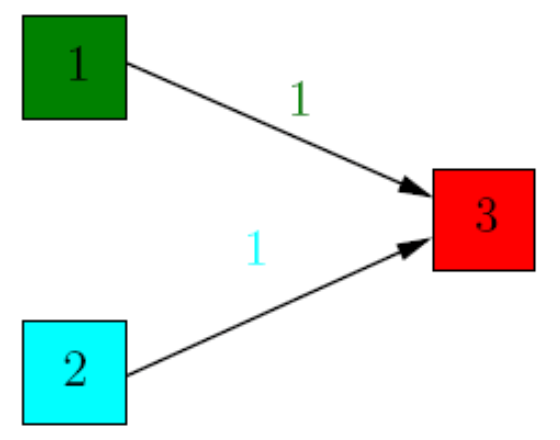
    
*Example from [Math Explorers' Club](http://www.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html)*
</div>

We iteratively compute the rank of the 3 pages using the adjancency matrix:
$ A=\left(
\begin{array}{ccc}
0 & 0 &0\\ 
0 & 0 &0\\ 
1 & 1 &0\\ 
\end{array} \right)$

$$v_0= \left(
\begin{array}{c}
\frac{1}{3} \\ 
\frac{1}{3} \\
\frac{1}{3} \\ 
\end{array}
\right), \; v_1= A ·v_0 =\left(
\begin{array}{c}
0 \\ 
0 \\
\frac{2}{3} \\ 
\end{array}
\right)
\; v_2= A ·v_1 =\left(
\begin{array}{c}
0 \\ 
0 \\
0 \\ 
\end{array}
\right)$$





So in this case the rank of every page is 0. This is counterintuitive, as page 3 has 2 incoming links, so it must have some importance!

**The solution of Page Rank**:

In order to overcome these problems, fix a positive constant $p$ between 0 and 1, which we call the *damping factor* (a typical value for p is 0.85). Define the Page Rank matrix of the graph by  $M=(1-p)· A + p·B,$ where 
$B=\frac{1}{n}\left(
\begin{array}{cccc}
1 & 1 &··· & 1\\ 
\vdots & \vdots & \ddots &\vdots \\ 
1 & 1 &··· & 1\\ 
\end{array} \right),$

where $n$ is the number of nodes.

Intuitively, the matrix M "connects" the graph and gets rid of the dangling nodes. A node with no outgoing edges has now $p/n$ probability to move to any other node.

The PageRank vector for a web graph with transition matrix A, and damping factor p, is the unique probabilistic eigenvector of the matrix M, corresponding to the eigenvalue 1.

### Example 2

In [ ]:

plt.figure(figsize=(8,8))
# Create an empty directed graph structure with no nodes and no edges.
g = nx.DiGraph()
# Add one edge between node 1 and 2 and with weight=1.0
g.add_edge(1,3) # The nodes 1 and 2 are automatically added since they are not already in the graph.
g.add_edge(2,3) 

# Create a dictionary with nodes as keys and positions as values.
pos=nx.spring_layout(g) 
# Position nodes using Fruchterman-Reingold force-directed algorithm (layout algorithm). 

# Draw the edges of the graph g.
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_nodes(g,pos)
nx.draw_networkx_labels(g,pos)

# For directed graphs, "arrows" (actually just thicker stubs) are drawn at the head end. 
# Yes, it is ugly but drawing proper arrows with Matplotlib this way is tricky.
plt.axis('off') # Remove the axis of the plot.
plt.show()

In [ ]:
# Using power iteration method for computing the stationary vector

# To complete

In [ ]:
# Redo the computations for the Page Rank with pagerank function of NetworkX.

# To complete

### Example 3

In [ ]:
plt.figure(figsize=(8,8))
# Create an empty directed graph structure with no nodes and no edges.
g = nx.DiGraph()
# Add one edge between node 1 and 2 and with weight=1.0
g.add_edge(1,2,weight=1.0) # The nodes 1 and 2 are automatically added since they are not already in the graph.
g.add_edge(2,1,weight=1.0)
g.add_edge(2,3,weight=1.0)
g.add_edge(3,2,weight=1.0)
g.add_edge(3,4,weight=1.0)
g.add_edge(4,1,weight=1.0)
g.add_edge(4,2,weight=1.0)

# Create a dictionary with nodes as keys and positions as values.
pos=nx.spring_layout(g) 
# Position nodes using Fruchterman-Reingold force-directed algorithm (layout algorithm). 

# Draw the edges of the graph g.
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_nodes(g,pos)
nx.draw_networkx_labels(g,pos)

# For directed graphs, "arrows" (actually just thicker stubs) are drawn at the head end. 
# Yes, it is ugly but drawing proper arrows with Matplotlib this way is tricky.
plt.axis('off') # Remove the axis of the plot.
plt.show()

In [ ]:
# Using power iteration method for computing the stationary vector

L = nx.to_numpy_matrix(g)

d = 0.85 # PageRank parameter

N = len(L) # Number of rows of the matrix

# Normalize L matrix to convert it to a transitions matrix.
for row in L:
    row /= numpy.sum(row)

# Aply the transitions regularization model
L = numpy.nan_to_num(L) * d + (1-d) / N

print("Transitions Matrix Regularized:", L)

In [ ]:
# We can initialize the stationary vector to any set of values with sum 1.
p = numpy.zeros(N)
p[0] = 1.0

# The uniform distribution is a valid alternative:
# p = numpy.ones(N) / N

# Apply the power iteration method for computing the stationary vector
# (by default 100 iterations)
for i in range(1000):
    p = numpy.dot(p, L)
    
print("Vector estacionari:",p)

In [ ]:
# And the solution using the pagerank function of NetwrorkX
pr=nx.pagerank(g,alpha=0.85)
print(pr)

In [ ]:
#Plot the graph with the pagerank information:

# To complete

In [ ]:
# We can also use linear algebra techniques for computing the stationary vector

# Transpose L
Lt = L.transpose()

# Compute Lt's eigensystem
eig = numpy.linalg.eig(Lt)
# Find the index corresponding to the principal eigenvalue (closest to one)
index = 0
mindiff = 1.0e30
for i in range(N):
    diff = numpy.abs(eig[0][i] - 1.0)
    if diff < mindiff:
        mindiff = diff
        index = i
# Extract the corresponding column from the eigenvector matrix
v = eig[1][:,index]

# Before printing, we must normalize it so that its elements add up to one 
# (we need to interpret it as a probability distribution),
# and we take the real part (the imaginary part is 0 anyway)
print("Normalized principal eigenvector:", numpy.real (v / numpy.sum(v)))

### Example 4

In [ ]:

plt.figure(figsize=(4,4))

#Create the directed graph:
g = nx.DiGraph()
g.add_edge(2,3,weight=1.0)
g.add_edge(3,2,weight=1.0)
g.add_edge(4,1,weight=1.0)
g.add_edge(4,2,weight=1.0)
g.add_edge(5,2,weight=1.0)
g.add_edge(5,4,weight=1.0)
g.add_edge(5,6,weight=1.0)
g.add_edge(6,2,weight=1.0)
g.add_edge(6,5,weight=1.0)
g.add_edge(7,2,weight=1.0)
g.add_edge(7,5,weight=1.0)
g.add_edge(8,2,weight=1.0)
g.add_edge(8,5,weight=1.0)
g.add_edge(9,2,weight=1.0)
g.add_edge(9,5,weight=1.0)
g.add_edge(10,5,weight=1.0)
g.add_edge(11,5,weight=1.0)


# Use power iteration method for computing the stationary vector
L = nx.to_numpy_matrix(g)

d = 0.85 # PageRank parameter

# Number of rows of the matrix
N = len(L)


# Normalize L matrix to convert it to a transitions matrix.
for row in L:
    row /= numpy.sum(row)


# Aply the transitions regularization model
L = numpy.nan_to_num(L) * d + (1-d) / N

# We can initialize the stationary vector to any set of values with sum 1.
p = numpy.zeros(N)
p[0] = 1.0

# The uniform distribution is a valid alternative:
# p = numpy.ones(N) / N

# Apply the power iteration method for computing the stationary vector
# (by default 100 iterations)
for i in range(10):
    p = numpy.dot (p, L)

    


In [ ]:
#Plot the graph with the pagerank information:

# To complete

### Example 5

In [ ]:
# Create a random graph G_{n,p} with n=50 nodes and probability for edge creation p=0.08
g=nx.fast_gnp_random_graph(50, 0.08, seed=None, directed=True)


# Use power iteration method for computing the stationary vector
L = nx.to_numpy_matrix(g)

d = 0.85 # PageRank parameter

# Number of rows of the matrix
N = len(L)

# Normalize L matrix to convert it to a transitions matrix.
for row in L:
    row /= numpy.sum(row)

# Aply the transitions regularization model
L = numpy.nan_to_num(L) * d + (1-d) / N

# We can initialize the stationary vector to any set of values with sum 1.
p = numpy.zeros(N)
p[0] = 1.0

# Apply the power iteration method for computing the stationary vector
# (by default 100 iterations)
for i in range(100):
    p = numpy.dot (p, L)
pl = numpy.array(p)

print(pl)

In [ ]:
# Plot the graph with the pagerank information and using a circular layout:

# To complete